<a href="https://colab.research.google.com/github/Chanchal28/Chanchal/blob/master/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit

import warnings
warnings.filterwarnings('ignore')

In [76]:
batch_size = 256
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':                           #channel means depth.  In 3*28*28, 3 is the no. of channel(third dimension)
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255                                                          #image normalization
x_test /= 255                                                           #image normalization
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [77]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(1, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 26, 26, 1)         73        
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 13, 13, 1)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 11, 11, 16)        160       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 400)             

In [78]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 37s 619us/step - loss: 0.6104 - acc: 0.8005 - val_loss: 0.1482 - val_acc: 0.9549


In [79]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14823441397696732
Test accuracy: 0.9549


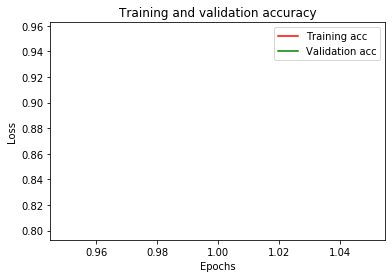

In [82]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()